# Exploration of Enron Data

The purpose of this notebook is to explore then Enron email and financial data for the purposes of completeting Udacity's Introduction to Machine Learning course.

In [1]:
# Imports needs to get data
import sys
sys.path.append("./tools/")
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# For algorithims

# For parameter tuning
import sklearn.pipeline

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from time import time

C:\Users\jcall_000\AppData\Local\conda\conda\envs\py2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
features_list = ['poi'] # Add features here

with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [3]:
print "We have data on " + str(len(data_dict.keys())) + " people within Enron"

We have data on 146 people within Enron


# Outlier Detection

We start our investigation using the salary and bonus figures, as I believe these two figures will either display outliers, or act as latent variables for outliers. For example mistyped figures, or other data-processing errors will likely be captured within these two figures.

We start by simply plotting Salary against Bonus.

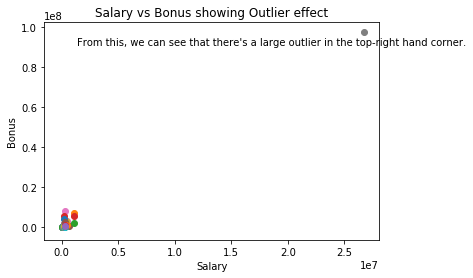

In [4]:
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.title('Salary vs Bonus showing Outlier effect')
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.figtext(x=0.2, y=0.8, s='From this, we can see that there\'s a large outlier in the top-right hand corner.')
plt.show()

That outlier is a bit odd! Let's explore it a bit more below.

In [5]:
# Convert dict to Dataframe
df = pd.DataFrame.from_dict(data_dict, orient='index')
df = df.replace('NaN', np.nan)

In [6]:
df.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
count,9.500000e+01,86.000000,3.900000e+01,1.250000e+02,1.020000e+02,8.200000e+01,1.100000e+02,86.000000,1.800000e+01,1.260000e+02,9.500000e+01,4.000000e+00,86.000000,9.300000e+01,86.000000,1.700000e+01,4.900000e+01,6.600000e+01,86.000000
mean,5.621943e+05,2073.860465,1.642674e+06,5.081526e+06,5.987054e+06,2.374235e+06,2.321741e+06,1176.465116,1.664106e+05,6.773957e+06,1.087289e+05,4.196250e+07,608.790698,9.190650e+05,41.232558,1.668049e+05,-1.140475e+06,1.470361e+06,64.895349
std,2.716369e+06,2582.700981,5.161930e+06,2.906172e+07,3.106201e+07,1.071333e+07,1.251828e+07,1178.317641,4.201494e+06,3.895777e+07,5.335348e+05,4.708321e+07,1841.033949,4.589253e+06,100.073111,3.198914e+05,4.025406e+06,5.942759e+06,86.979244
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,3.285000e+03,7.000000e+04,-2.604490e+06,2.000000,-7.576788e+06,-4.409300e+04,1.480000e+02,4.000000e+05,12.000000,2.000000e+00,0.000000,3.285000e+03,-2.799289e+07,6.922300e+04,0.000000
25%,2.118160e+05,541.250000,8.157300e+04,3.944750e+05,5.278862e+05,4.312500e+05,2.540180e+05,249.750000,-3.896218e+05,4.945102e+05,2.261400e+04,1.600000e+06,22.750000,1.215000e+03,1.000000,9.878400e+04,-6.948620e+05,2.812500e+05,10.000000
50%,2.599960e+05,1211.000000,2.274490e+05,1.101393e+06,1.310814e+06,7.693750e+05,4.517400e+05,740.500000,-1.469750e+05,1.102872e+06,4.695000e+04,4.176250e+07,41.000000,5.238200e+04,8.000000,1.085790e+05,-1.597920e+05,4.420350e+05,35.000000
75%,3.121170e+05,2634.750000,1.002672e+06,2.093263e+06,2.547724e+06,1.200000e+06,1.002370e+06,1888.250000,-7.500975e+04,2.949847e+06,7.995250e+04,8.212500e+07,145.500000,3.620960e+05,24.750000,1.137840e+05,-3.834600e+04,9.386720e+05,72.250000
max,2.670423e+07,15149.000000,3.208340e+07,3.098866e+08,3.117640e+08,9.734362e+07,1.303223e+08,5521.000000,1.545629e+07,4.345095e+08,5.235198e+06,8.392500e+07,14368.000000,4.266759e+07,609.000000,1.398517e+06,-8.330000e+02,4.852193e+07,528.000000


By viewing this, we can see that the Max values are typically a lot higher than the mean, let's explore the Max values a bit more...

In [7]:
df.sort_values(by=['salary'], ascending=False)[:5] # print highest five salary amounts

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
TOTAL,26704229.0,NaN,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,NaN,-7576788.0,434509511.0,...,83925000.0,NaN,42667589.0,NaN,False,1398517.0,-27992891.0,48521928.0,NaN,NaN
SKILLING JEFFREY K,1111258.0,3627.0,NaN,8682716.0,19250000.0,5600000.0,6843672.0,2042.0,NaN,26093672.0,...,NaN,108.0,22122.0,30.0,True,NaN,NaN,1920000.0,jeff.skilling@enron.com,88.0
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,NaN,49110078.0,...,81525000.0,36.0,10359729.0,16.0,True,NaN,-300000.0,3600000.0,kenneth.lay@enron.com,123.0
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,10433518.0,2000000.0,4188667.0,2979.0,NaN,14622185.0,...,2000000.0,21.0,7427621.0,6.0,False,NaN,-3367011.0,1617011.0,mark.frevert@enron.com,242.0
PICKERING MARK R,655037.0,898.0,NaN,1386690.0,28798.0,300000.0,NaN,728.0,NaN,28798.0,...,400000.0,67.0,NaN,0.0,False,NaN,NaN,NaN,mark.pickering@enron.com,7.0


We can now see that there is a Total Figure that is a lot higher than the other figures. The second highest figure, Is Jeffery Skilling who was the CEO of Enron at the time of the collapse - so it makes sense that he has a high salary (and other financial figures)

Given this findings, it's fair to remove the Total Figure, but keep Jeffery Skilling and below, as these figures make logical sense.

We also notice by taking a look at the POIs in the dataset that there is a business called THE TRAVEL AGENCY IN THE PARK in the dataset. As the purpose of this investigation is to indentify POIs, we'll remove this data point.

In [8]:
df.drop(['TOTAL'], inplace=True)
df.drop(['THE TRAVEL AGENCY IN THE PARK'], inplace=True)

# Drop figures from data_dict as well
data_dict.pop('TOTAL', 0)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', 0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

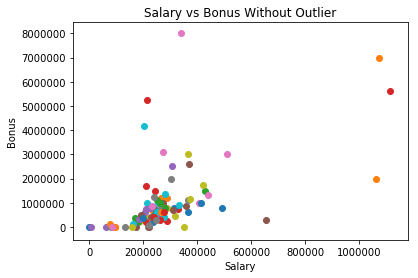

In [9]:
# Re-plot same graph without outlier
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.title('Salary vs Bonus Without Outlier')
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.show()

# Feature Creation and Pre-processing
## Feature Creation
Taking a look at the data, and reviewing course material, there is really only one feature that I want to create. The following feature is the ratio of:

$$ total_to / from_this_person_to_poi

In [10]:
for key in data_dict:
    # Create from_ratio. Set from_ratio to zero if NaN appears
    if (data_dict[key]['from_this_person_to_poi'] == 'NaN') or (data_dict[key]['from_messages'] == 'NaN'):
        data_dict[key]['from_ratio'] = 0
    else:
        data_dict[key]['from_ratio'] = (1.0*data_dict[key]['from_this_person_to_poi']/data_dict[key]['from_messages'])
    # Create to_ratio. set to_ratio to zero if NaN appears
    if (data_dict[key]['from_poi_to_this_person']=='NaN') or (data_dict[key]['to_messages']=='NaN'):
          data_dict[key]['to_ratio'] = 0
    else:  
        data_dict[key]['to_ratio'] = (1.0*data_dict[key]['from_poi_to_this_person']/data_dict[key]['to_messages']) 

In [11]:
features_list = ["poi", "salary", "bonus", 'deferral_payments', 'total_payments', 'loan_advances', 
                 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses',
                 'exercised_stock_options', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 
                 'director_fees', 'from_ratio', 'to_ratio'] # add new features to dataset
data = featureFormat(data_dict, features_list)

In [12]:
# Scale features
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = scaler.fit_transform(data)

In [13]:
### Split Training/Test datasets

labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, 
                                                                                             labels, 
                                                                                             test_size=0.1, 
                                                                                             random_state=42)

## Feature Selection

For the feature selection, I'm going to use sklearn's select k-best feautures.

In [14]:
skbest = SelectKBest(k=10)
sk_transform = skbest.fit_transform(features_train, labels_train)
indices = skbest.get_support(True)

In [15]:
best_list = ['poi']
for index in indices:
    print 'features: %s score: %f' % (features_list[index + 1], skbest.scores_[index])
    best_list.append(features_list[index + 1])

features: salary score: 5.681545
features: bonus score: 3.707765
features: deferred_income score: 8.184312
features: total_stock_value score: 10.259559
features: expenses score: 4.694982
features: exercised_stock_options score: 11.284944
features: long_term_incentive score: 3.513005
features: director_fees score: 1.831547
features: from_ratio score: 12.569123
features: to_ratio score: 3.063668


# Model Building

The purpose of this investigation is to build a model to identify Persons of Interest. In this particular case, we have labelled data as to whether the person is a Person of Interest or not. Since we have labelled data we're trying to solve a supervised learning problem using classification techniques.

We know from the previous section of this report, that we have a list of the 10 best features to use in models. These are:

In [16]:
best_list

['poi',
 'salary',
 'bonus',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'exercised_stock_options',
 'long_term_incentive',
 'director_fees',
 'from_ratio',
 'to_ratio']

In [17]:
my_data = featureFormat(data_dict, best_list)


labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, 
                                                                                             labels, 
                                                                                             test_size=0.1, 
                                                                                             random_state=42)

The models we're going to be using are the following:

* Naive Bayes (as a baseline)
* Random Forest Classitfication
* K Nearest Neighbors Classification

All of the above models will include parameter tuning where possible.

In [18]:
# Import models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# Metric for evaluation.
from sklearn.metrics import accuracy_score
# Import Gridsearch for hyper-paramater tuning
from sklearn.model_selection import GridSearchCV

# Baseline Models (No parameter tuning)
### Support Vector Classification

In [19]:
# Support Vector Classification
clf = SVC()
clf.fit(features_train, labels_train)
clf.score(features_test, labels_test)

0.73333333333333328

### K-Nearest Neighbors Classification

In [20]:
clf = KNeighborsClassifier()
clf.fit(features_train, labels_train)
clf.score(features_test, labels_test)

0.80000000000000004

### Naive Bayes

In [21]:
clf = GaussianNB()
clf.fit(features_train, labels_train)
clf.score(features_test, labels_test)

0.26666666666666666

## Paramater Tuning

The alogorithims above are simply run using the default paramters. It is generally believed, that we should get better performance from the algorithim by tuning the parameters.

One other thing that is sitting uncomfortably with me, is we arbitarily set the feature selection to be 10 features. But we're trying three different algorithims, perhaps 10 features aren't good for some of these models? So to combat this, we're going also play around with the number of features.

In [22]:
select_best = SelectKBest(k=10)
clf = KNeighborsClassifier()

steps = [('feature_selection', select_best),
        ('model', clf)]

pipeline = sklearn.pipeline.Pipeline(steps)

In [23]:
parameters = dict(feature_selection__k = [3, 5, 7, 9, 11, 12, 15], 
              model__n_neighbors = [2, 3, 4, 5, 6, 7],
              model__metric = ['euclidean', 'minkowski'])

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(features_train, labels_train)
predictions = cv.predict(features_test)
report = sklearn.metrics.classification_report(labels_test, predictions)
print report
print '\n'
print cv.best_params_

C:\Users\jcall_000\AppData\Local\conda\conda\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [4] are constant.
  UserWarning)
C:\Users\jcall_000\AppData\Local\conda\conda\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


             precision    recall  f1-score   support

        0.0       0.79      1.00      0.88        11
        1.0       1.00      0.25      0.40         4

avg / total       0.84      0.80      0.75        15



{'model__metric': 'euclidean', 'feature_selection__k': 12, 'model__n_neighbors': 2}


In [24]:
def svc_parameters(features, labels, nfolds):
    C_options = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels = ['linear', 'poly', 'rbf']
    param_grid = {'C': C_options,
                  'gamma' : gammas,
                  'kernel' : kernels}
    grid_search = GridSearchCV(SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [25]:
svc_parameters(features_train, labels_train, 2)

KeyboardInterrupt: 